<a href="https://colab.research.google.com/github/BrandoSor4/Data-Mining/blob/main/Soriano_Brando_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import required packages.
2. Load the data file


3 pts.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error

In [ ]:
diamonds_train = pd.read_csv("diamonds_train.csv")
diamonds_score = pd.read_csv("diamonds_score.csv")

In [ ]:
print("Diamonds Train Data:")
print(diamonds_train.head())

print("Diamond Score Data:")
print(diamonds_score.head())

Diamonds Train Data:
     shape        cut color clarity  weight_ct     fluorescence  \
0  Emerald  Very Good     D     SI1       1.70  Medium BlueInfo   
1    Round      Ideal     F      IF       1.07        FaintInfo   
2  Radiant  Very Good     G    VVS1       1.05         NoneInfo   
3    Round      Ideal     E    VVS2       2.85         NoneInfo   
4    Round      Ideal     D     SI1       0.35         NoneInfo   

   length_width_ratio     polish   symmetry                    girdle cutlet  \
0                1.29  Very Good  Very Good        Thin to Very Thick   None   
1                1.00  Excellent  Excellent    Thin to Slightly Thick   None   
2                1.20  Excellent  Excellent   Slightly Thick to Thick   None   
3                1.01  Excellent  Excellent  Medium to Slightly Thick   None   
4                1.00  Excellent  Excellent  Medium to Slightly Thick   None   

   price  depth  table  length  width  height  
0  13519   68.1   70.0    7.94   6.17    4.20  

4. Check the first 5 rows of data
5. Check for missing values.
6. Check data distribution by diamond shape using a histogram (bar graph).


2 pts.



In [ ]:
print("First 5 rows of diamonds_train data:")
print(diamonds_train.head())

First 5 rows of diamonds_train data:
     shape        cut color clarity  weight_ct     fluorescence  \
0  Emerald  Very Good     D     SI1       1.70  Medium BlueInfo   
1    Round      Ideal     F      IF       1.07        FaintInfo   
2  Radiant  Very Good     G    VVS1       1.05         NoneInfo   
3    Round      Ideal     E    VVS2       2.85         NoneInfo   
4    Round      Ideal     D     SI1       0.35         NoneInfo   

   length_width_ratio     polish   symmetry                    girdle cutlet  \
0                1.29  Very Good  Very Good        Thin to Very Thick   None   
1                1.00  Excellent  Excellent    Thin to Slightly Thick   None   
2                1.20  Excellent  Excellent   Slightly Thick to Thick   None   
3                1.01  Excellent  Excellent  Medium to Slightly Thick   None   
4                1.00  Excellent  Excellent  Medium to Slightly Thick   None   

   price  depth  table  length  width  height  
0  13519   68.1   70.0    7.94 

In [ ]:
missing_values = diamonds_train.isnull().sum()
print("Missing Values in diamonds_train data:")
print(missing_values)


Missing Values in diamonds_train data:
shape                 0
cut                   0
color                 0
clarity               0
weight_ct             0
fluorescence          0
length_width_ratio    0
polish                0
symmetry              0
girdle                0
cutlet                0
price                 0
depth                 0
table                 0
length                0
width                 0
height                0
dtype: int64


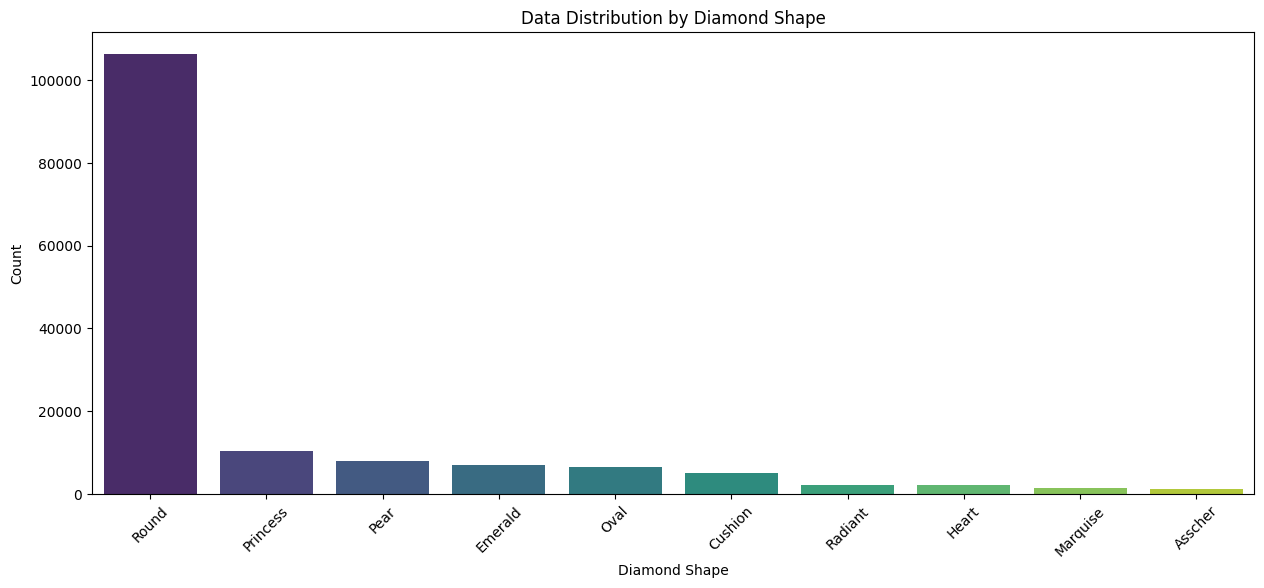

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=diamonds_train, x='shape', palette='viridis', saturation=0.75, order=diamonds_train['shape'].value_counts().index)
plt.title('Data Distribution by Diamond Shape')
plt.xlabel('Diamond Shape')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

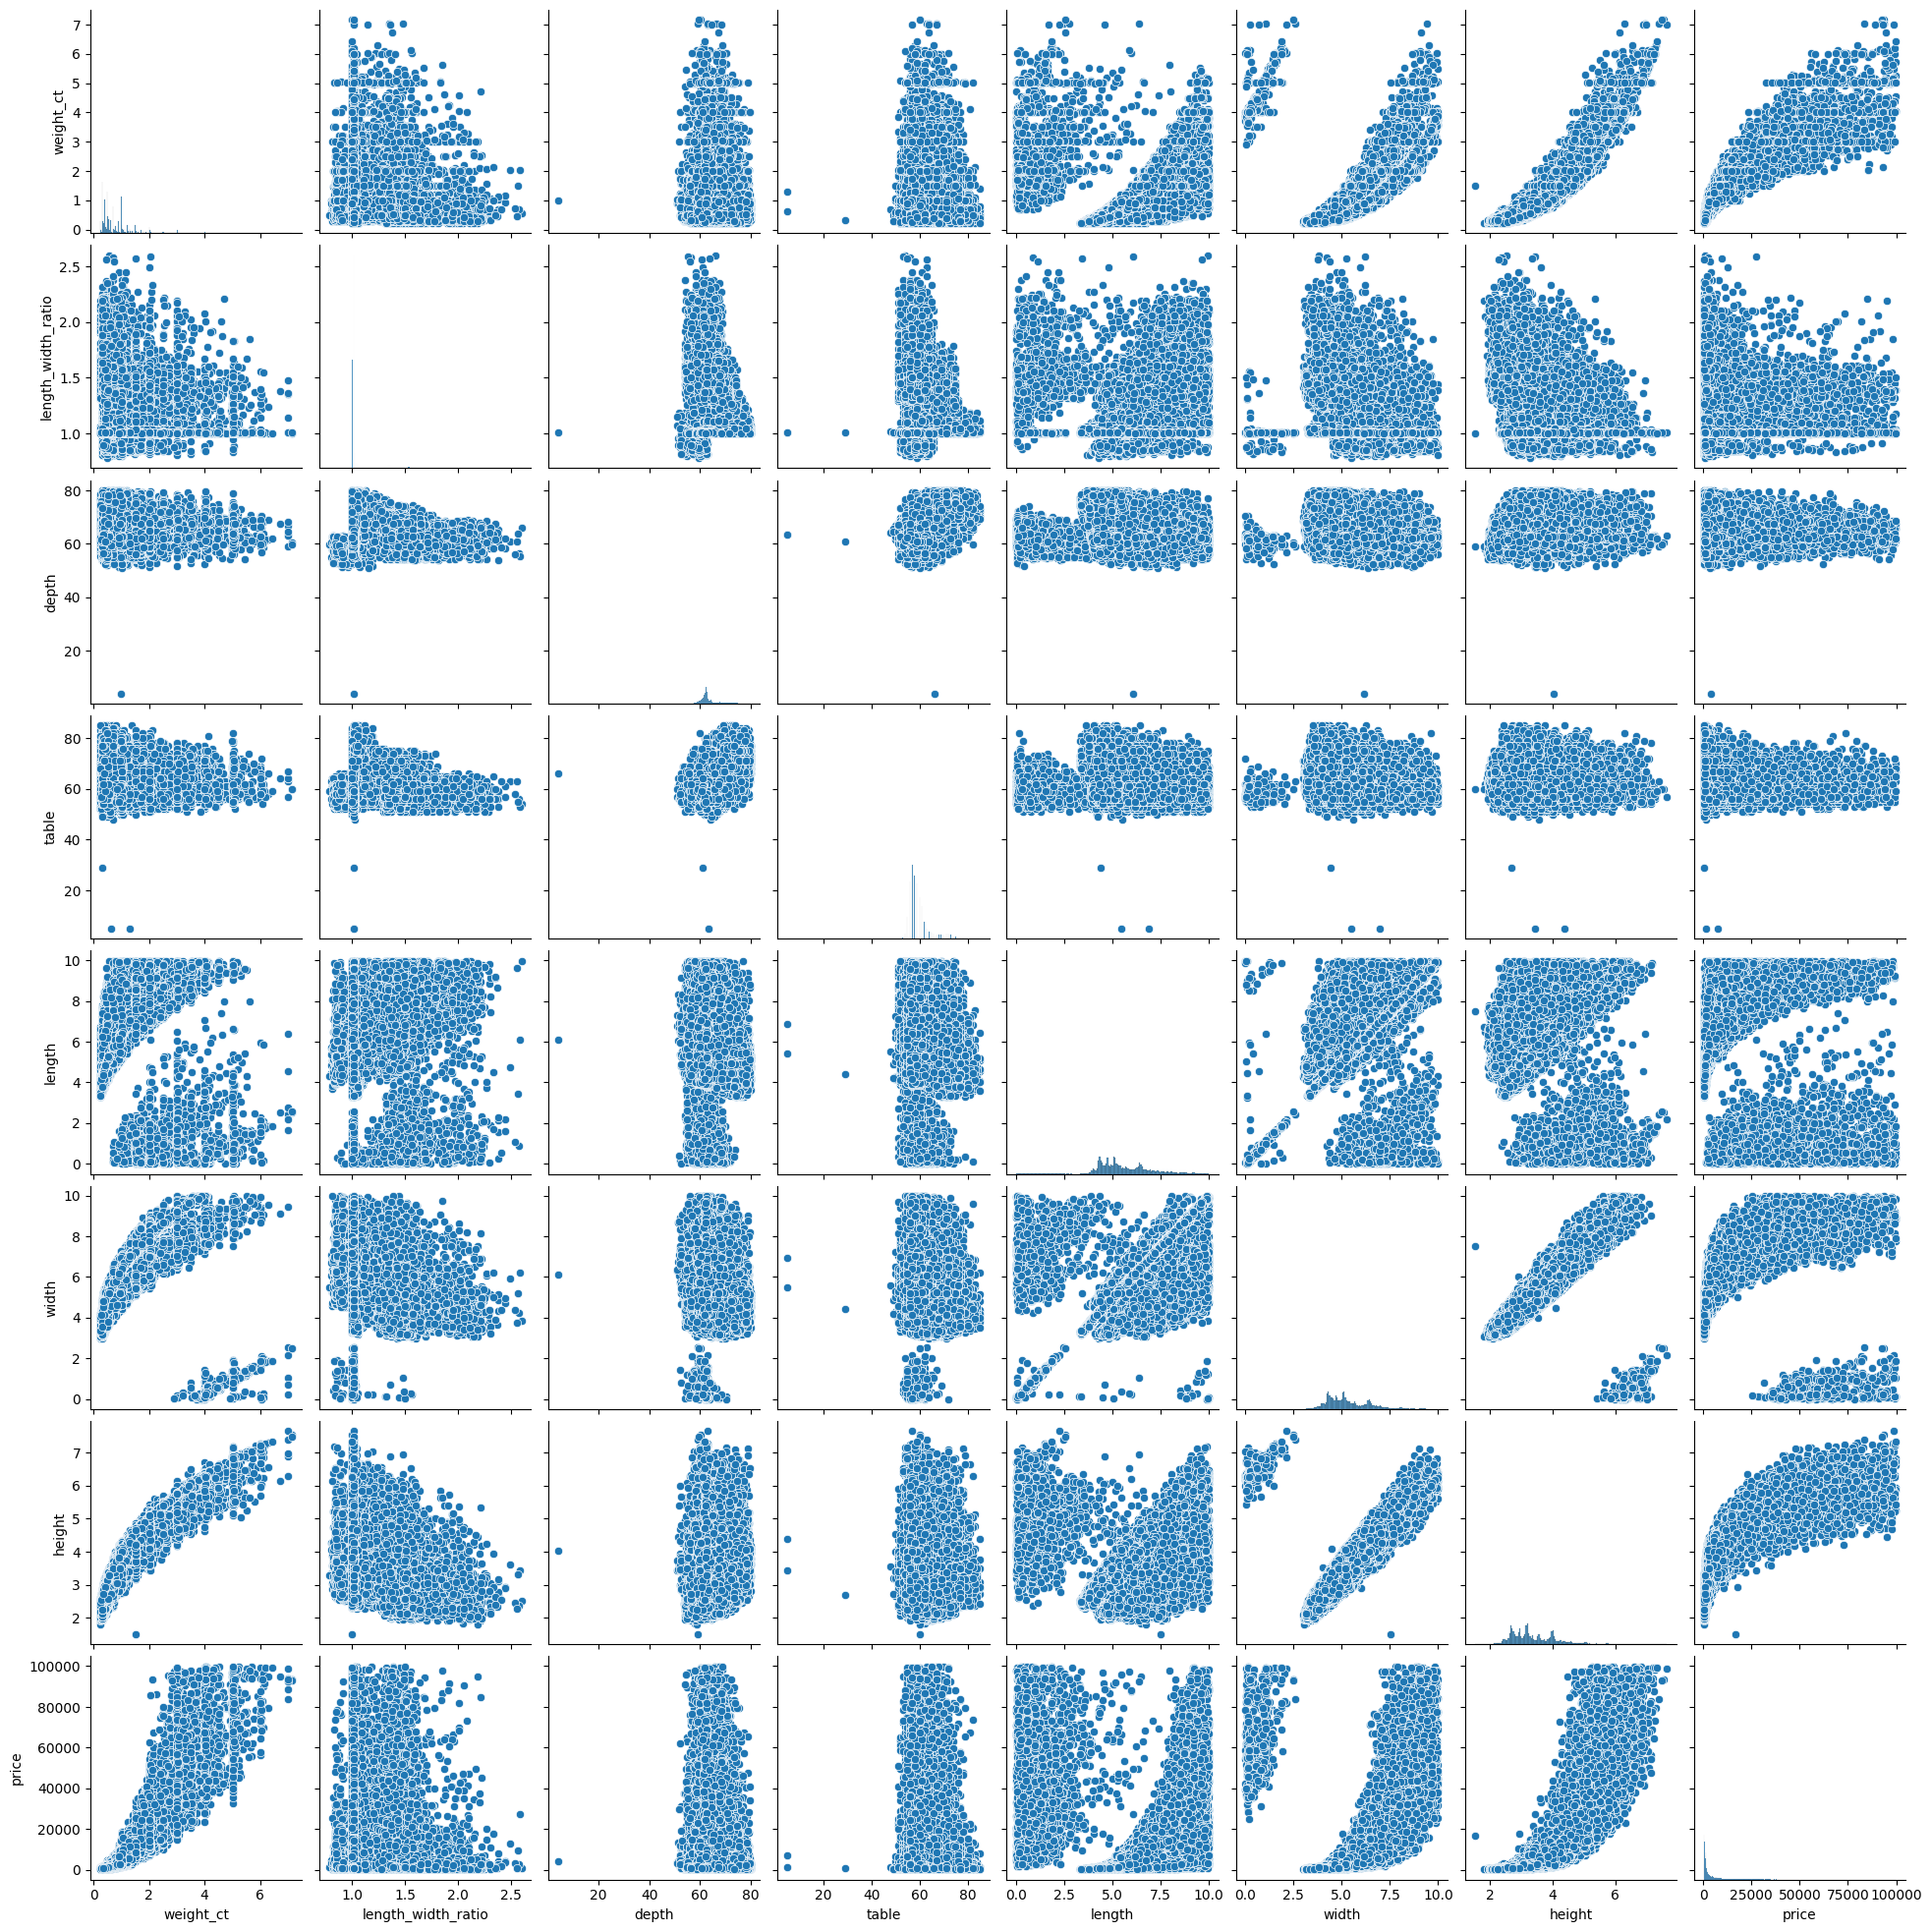

In [ ]:
sns.pairplot(data=diamonds_train, vars=['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width', 'height', 'price'])

plt.show()

## Comments:
## I am able to identify a linear relationship with carat with price as the target. As well with height.
## Homoscedasticity in Depth and Table
## It sesm there is two outliers for diamonds with less height and a greater length which maybe  a oval shaped diamond.


9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict price for round diamonds.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

8 pts.

In [ ]:
features = ['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width', 'height']

In [ ]:
target = 'price'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diamonds_train[features], diamonds_train[target], test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_y = model.predict(X_test)

r2 = r2_score(y_test, pred_y)

mae = mean_absolute_error(y_test, pred_y)

rmse = math.sqrt(mean_squared_error(y_test, pred_y))

max_err = max_error(y_test, pred_y)

print('Regression model performance evaluation:')
print('R-Squared, R2:', r2)
print('Mean Absolute Error, MAE:', mae)
print('Root Mean Squared Error, RMSE:', rmse)
print('Max error, ME:', max_err)


Regression model performance evaluation:
R-Squared, R2: 0.8507409579591645
Mean Absolute Error, MAE: 1623.0949439878889
Root Mean Squared Error, RMSE: 3872.8772645091553
Max error, ME: 70905.80556417894


## The fit is not strong enough to use as a practioner, especially with a mximum error that can be greater than 70,000 is not acceptable for someone in the diamond market.

15. Use the model to predict prices in the diamond_score.csv dataset
16. Compare predicted and actual prices for the diamonds in the diamond_score.csv dataset

10 pts.

In [ ]:
diamonds_score_data = pd.read_csv('diamonds_score.csv')


In [ ]:
features = ['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width', 'height']


In [ ]:
actual_prices = diamonds_score_data['price']


In [ ]:
price_comparison = pd.DataFrame({'actual_Price': actual_prices, 'Predicted_Price': predicted_prices})


In [ ]:
print(price_comparison)


   Actual_Price  Predicted_Price
0          2311      1839.709491
1          3985      6005.191962
2          5935      4335.343759
3           578       567.191210
4          7195     13606.075299
5          8942     11372.161454
6           486     -1167.814360
7           483       147.983966
8           514       364.509115
9          6725      6765.069841


In [ ]:
pd.read_csv('diamonds_score.csv')

print(diamond_score_data.columns)

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')
